# DNN: analysis with Keras of 2D data

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8 #80% of data is put in training, 20% in validation

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

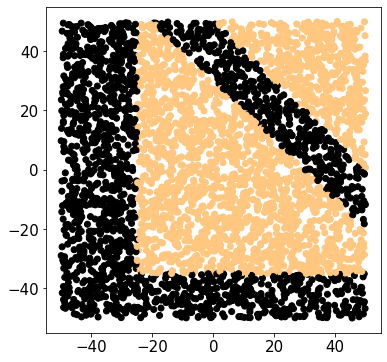

In [2]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N) #n of point for training 80%*3200
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50 #50 is the size of the box -> i rescale to a box [-1,1]

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow

In [12]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

CASE=1

if CASE==1:
    model = Sequential() #initialize a model. sintax from keras
    model.add(Dense(L,input_shape=(L,),activation='relu')) #adds a layer, called Dense.The shape is the same of the data
    model.add(Dense(20,activation='relu')) #in the 2nd layer i want 20 nodes
    model.add(Dense(20,activation='relu'))
    #model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2)) #starting point 0.2
    model.add(Dense(1,activation='sigmoid')) #last layer. 1 for single node. all the layer collapese into only one and
                                             #the output is [0,1], cause of the sigmoid
    nepoch=400
# as case 1 but one layer shorter
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==10:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(6,activation='sigmoid'))
    model.add(Dense(2,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==20:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='linear'))
    model.add(Dense(5,activation='tanh'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


### Optimization method and cost function

In [13]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

### Training

In [14]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6524 - accuracy: 0.6409 - val_loss: 0.6340 - val_accuracy: 0.6650
Epoch 2/400
64/64 - 0s - loss: 0.6088 - accuracy: 0.6837 - val_loss: 0.6038 - val_accuracy: 0.6775
Epoch 3/400
64/64 - 0s - loss: 0.5789 - accuracy: 0.7088 - val_loss: 0.5862 - val_accuracy: 0.6825
Epoch 4/400
64/64 - 0s - loss: 0.5628 - accuracy: 0.7206 - val_loss: 0.5716 - val_accuracy: 0.6900
Epoch 5/400
64/64 - 0s - loss: 0.5394 - accuracy: 0.7337 - val_loss: 0.5567 - val_accuracy: 0.7025
Epoch 6/400
64/64 - 0s - loss: 0.5243 - accuracy: 0.7384 - val_loss: 0.5370 - val_accuracy: 0.7225
Epoch 7/400
64/64 - 0s - loss: 0.5062 - accuracy: 0.7566 - val_loss: 0.5180 - val_accuracy: 0.7387
Epoch 8/400
64/64 - 0s - loss: 0.4916 - accuracy: 0.7619 - val_loss: 0.5055 - val_accuracy: 0.7450
Epoch 9/400
64/64 - 0s - loss: 0.4795 - accuracy: 0.7672 - val_loss: 0.4924 - val_accuracy: 0.7525
Epoch 10/400
64/64 - 0s - loss: 0.4725 - accuracy: 0.7775 - val_loss: 0.4832 - val_accuracy: 0.7600
Epoch 11/

Epoch 84/400
64/64 - 0s - loss: 0.2831 - accuracy: 0.8703 - val_loss: 0.2854 - val_accuracy: 0.8700
Epoch 85/400
64/64 - 0s - loss: 0.2814 - accuracy: 0.8725 - val_loss: 0.2873 - val_accuracy: 0.8675
Epoch 86/400
64/64 - 0s - loss: 0.2833 - accuracy: 0.8706 - val_loss: 0.2858 - val_accuracy: 0.8675
Epoch 87/400
64/64 - 0s - loss: 0.2853 - accuracy: 0.8672 - val_loss: 0.2942 - val_accuracy: 0.8587
Epoch 88/400
64/64 - 0s - loss: 0.2846 - accuracy: 0.8675 - val_loss: 0.2894 - val_accuracy: 0.8637
Epoch 89/400
64/64 - 0s - loss: 0.2840 - accuracy: 0.8687 - val_loss: 0.2850 - val_accuracy: 0.8662
Epoch 90/400
64/64 - 0s - loss: 0.2846 - accuracy: 0.8675 - val_loss: 0.2908 - val_accuracy: 0.8600
Epoch 91/400
64/64 - 0s - loss: 0.2854 - accuracy: 0.8656 - val_loss: 0.2839 - val_accuracy: 0.8712
Epoch 92/400
64/64 - 0s - loss: 0.2823 - accuracy: 0.8700 - val_loss: 0.2868 - val_accuracy: 0.8650
Epoch 93/400
64/64 - 0s - loss: 0.2822 - accuracy: 0.8691 - val_loss: 0.2824 - val_accuracy: 0.8700


Epoch 166/400
64/64 - 0s - loss: 0.2715 - accuracy: 0.8725 - val_loss: 0.2832 - val_accuracy: 0.8625
Epoch 167/400
64/64 - 0s - loss: 0.2692 - accuracy: 0.8750 - val_loss: 0.2711 - val_accuracy: 0.8737
Epoch 168/400
64/64 - 0s - loss: 0.2694 - accuracy: 0.8731 - val_loss: 0.2717 - val_accuracy: 0.8737
Epoch 169/400
64/64 - 0s - loss: 0.2670 - accuracy: 0.8759 - val_loss: 0.2746 - val_accuracy: 0.8687
Epoch 170/400
64/64 - 0s - loss: 0.2671 - accuracy: 0.8747 - val_loss: 0.2733 - val_accuracy: 0.8675
Epoch 171/400
64/64 - 0s - loss: 0.2697 - accuracy: 0.8728 - val_loss: 0.2717 - val_accuracy: 0.8737
Epoch 172/400
64/64 - 0s - loss: 0.2662 - accuracy: 0.8756 - val_loss: 0.2754 - val_accuracy: 0.8675
Epoch 173/400
64/64 - 0s - loss: 0.2695 - accuracy: 0.8734 - val_loss: 0.2701 - val_accuracy: 0.8763
Epoch 174/400
64/64 - 0s - loss: 0.2669 - accuracy: 0.8763 - val_loss: 0.2759 - val_accuracy: 0.8687
Epoch 175/400
64/64 - 0s - loss: 0.2678 - accuracy: 0.8750 - val_loss: 0.2740 - val_accurac

Epoch 248/400
64/64 - 0s - loss: 0.2627 - accuracy: 0.8756 - val_loss: 0.2670 - val_accuracy: 0.8763
Epoch 249/400
64/64 - 0s - loss: 0.2622 - accuracy: 0.8756 - val_loss: 0.2678 - val_accuracy: 0.8750
Epoch 250/400
64/64 - 0s - loss: 0.2646 - accuracy: 0.8747 - val_loss: 0.2690 - val_accuracy: 0.8725
Epoch 251/400
64/64 - 0s - loss: 0.2650 - accuracy: 0.8750 - val_loss: 0.2700 - val_accuracy: 0.8725
Epoch 252/400
64/64 - 0s - loss: 0.2639 - accuracy: 0.8769 - val_loss: 0.2755 - val_accuracy: 0.8712
Epoch 253/400
64/64 - 0s - loss: 0.2621 - accuracy: 0.8769 - val_loss: 0.2694 - val_accuracy: 0.8687
Epoch 254/400
64/64 - 0s - loss: 0.2631 - accuracy: 0.8772 - val_loss: 0.2705 - val_accuracy: 0.8712
Epoch 255/400
64/64 - 0s - loss: 0.2644 - accuracy: 0.8750 - val_loss: 0.2690 - val_accuracy: 0.8737
Epoch 256/400
64/64 - 0s - loss: 0.2632 - accuracy: 0.8763 - val_loss: 0.2716 - val_accuracy: 0.8687
Epoch 257/400
64/64 - 0s - loss: 0.2658 - accuracy: 0.8741 - val_loss: 0.2691 - val_accurac

64/64 - 0s - loss: 0.2627 - accuracy: 0.8766 - val_loss: 0.2691 - val_accuracy: 0.8725
Epoch 330/400
64/64 - 0s - loss: 0.2625 - accuracy: 0.8753 - val_loss: 0.2685 - val_accuracy: 0.8700
Epoch 331/400
64/64 - 0s - loss: 0.2630 - accuracy: 0.8769 - val_loss: 0.2681 - val_accuracy: 0.8712
Epoch 332/400
64/64 - 0s - loss: 0.2647 - accuracy: 0.8750 - val_loss: 0.2651 - val_accuracy: 0.8763
Epoch 333/400
64/64 - 0s - loss: 0.2585 - accuracy: 0.8769 - val_loss: 0.2725 - val_accuracy: 0.8712
Epoch 334/400
64/64 - 0s - loss: 0.2635 - accuracy: 0.8753 - val_loss: 0.2665 - val_accuracy: 0.8737
Epoch 335/400
64/64 - 0s - loss: 0.2621 - accuracy: 0.8763 - val_loss: 0.2671 - val_accuracy: 0.8725
Epoch 336/400
64/64 - 0s - loss: 0.2605 - accuracy: 0.8772 - val_loss: 0.2702 - val_accuracy: 0.8700
Epoch 337/400
64/64 - 0s - loss: 0.2639 - accuracy: 0.8759 - val_loss: 0.2703 - val_accuracy: 0.8675
Epoch 338/400
64/64 - 0s - loss: 0.2604 - accuracy: 0.8763 - val_loss: 0.2694 - val_accuracy: 0.8725
Epoc

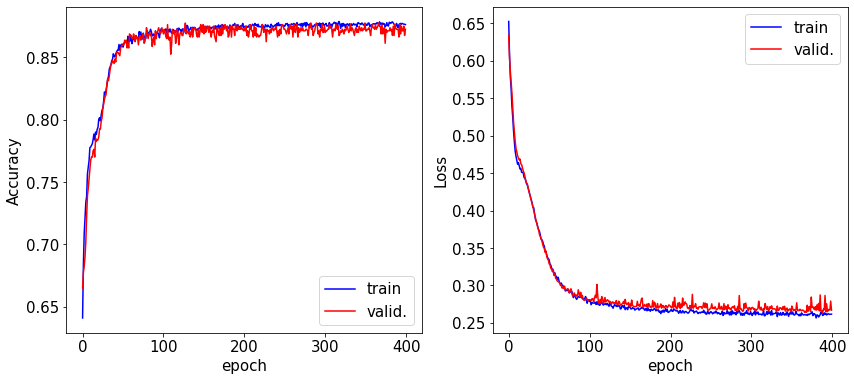

In [15]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [16]:
#the training is always larger than validation
#the spikes are due to adam o to the dataset?

In [17]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

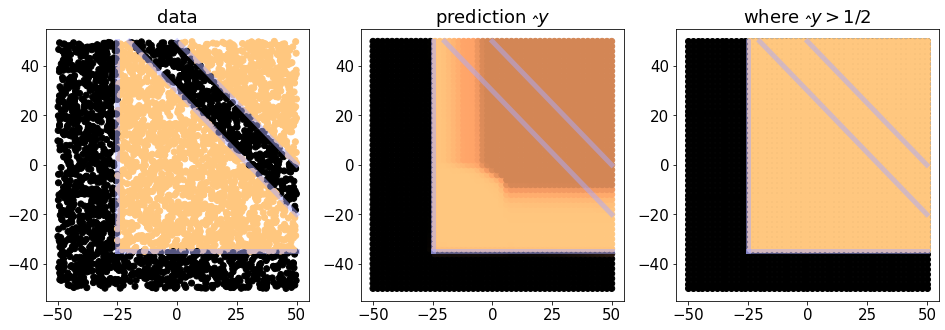

In [11]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show